# MODELACIÓN DE RETENCIÓN DE CLIENTES DE BETA BANK

# Tabla de Contenidos

* [1 PREPROCESAMIENTO DE DATOS](#1)
* [2 ANÁLISIS EXPLORATORIO DE DATOS](#2)
* [3 ESTANDARIZACIÓN DE DATOS](#3)
* [4 EVALUACIÓN DE MODELOS](#4)
* [5 VALIDACIÓN DEL MODELO SELECCIONADO](#5)
* [6 CONCLUSIONES](#5)    

## PREPROCESAMIENTO DE DATOS

In [1]:
# cargamos las librerías

import pandas as pd
!pip install sidetable
import sidetable as stb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler



In [2]:
# definimos el dataframe

df = pd.read_csv("/datasets/Churn.csv")

In [3]:
# visualizamos el dataframe

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
# eliminamos las columnas que no utilizaremos para el proyecto

df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

df.columns = df.columns.str.lower()

In [5]:
# escribimos mejor el nombre de las columnas

df = df.rename(columns = 
               {'creditscore': 'credit_score', 
                'numofproducts': 'num_products', 
                'hascrcard': 'credit_card',
                'isactivemember': 'active_member',
                'estimatedsalary': 'estimated_salary'})

In [6]:
# mostramos una vista previa del dataframe

df.head(10)

,credit_score,geography,gender,age,tenure,balance,num_products,credit_card,active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [7]:
# mostramos información general 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            9091 non-null   float64
 5   balance           10000 non-null  float64
 6   num_products      10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [8]:
# visualizamos el porcentaje de los valores ausentes en las columnas

df.stb.missing().reset_index()

,index,missing,total,percent
0,tenure,909,10000,9.09
1,credit_score,0,10000,0.00
2,geography,0,10000,0.00
3,gender,0,10000,0.00
4,age,0,10000,0.00
5,balance,0,10000,0.00
6,num_products,0,10000,0.00
7,credit_card,0,10000,0.00
8,active_member,0,10000,0.00
9,estimated_salary,0,10000,0.00


In [9]:
# visualizamos información estadística de la columna "tenure"

df['tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

**Debido a que no observamos valores extremos, procedemos a rellenar los valores ausentes con la media.**

In [10]:
# rellenamos los valores ausentes con la media

df['tenure'] = df['tenure'].fillna(df['tenure'].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  float64
 5   balance           10000 non-null  float64
 6   num_products      10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


## Análisis Exploratorio de Datos

**Procedemos a realizar un ánalisis exploratorio de los datos, comenzando con las variables numéricas.**

### Histogramas 

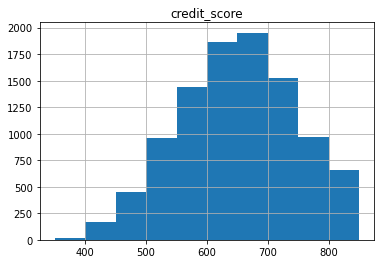

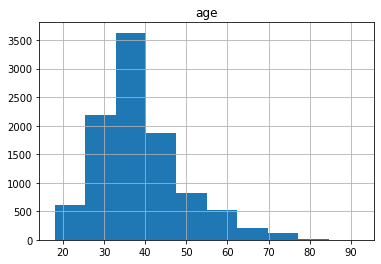

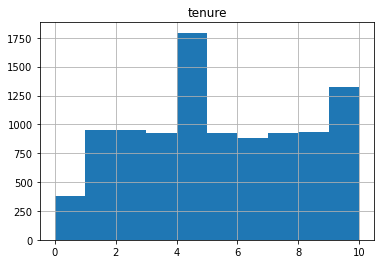

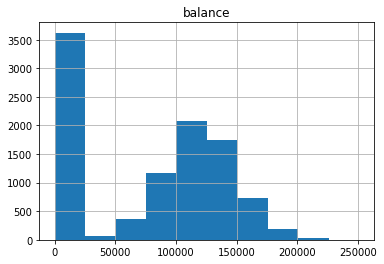

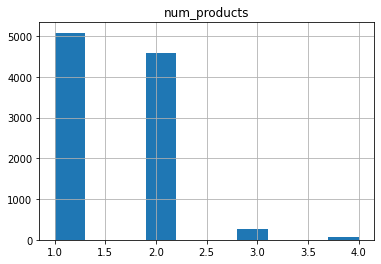

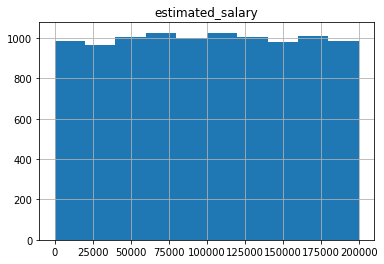

In [11]:
variables = ['credit_score', 'age', 'tenure', 'balance', 'num_products', 'estimated_salary']

for i in range(len(variables)):
    df.hist(variables[i])

### Diagramas de caja

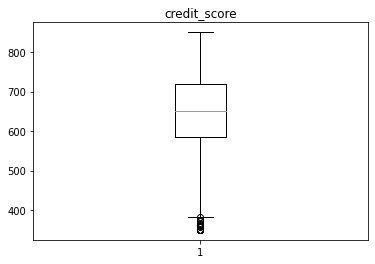

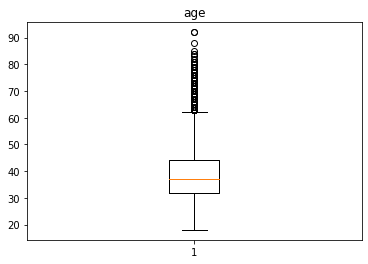

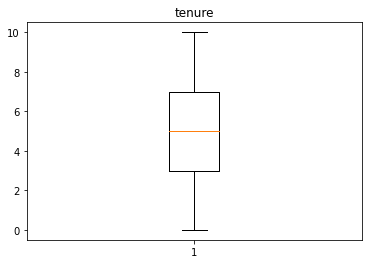

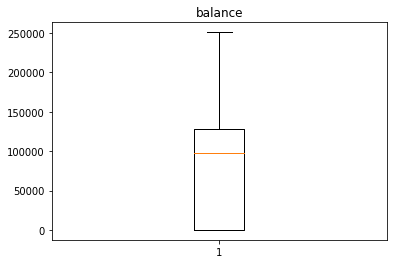

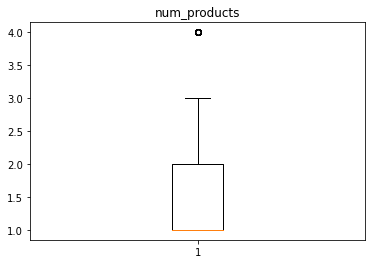

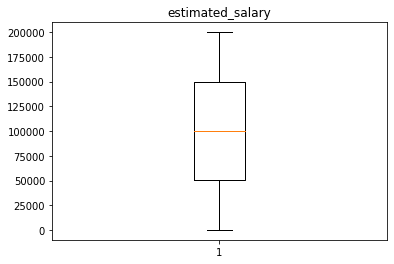

In [12]:
for variable in variables:
    plt.figure()
    plt.boxplot(df[variable])
    plt.title(variable)

### Estadística Descriptiva

In [13]:
for variable in variables:
    print(df[variable].describe())

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64
count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64
count    10000.00000
mean         4.99769
std          2.76001
min          0.00000
25%          3.00000
50%          4.99769
75%          7.00000
max         10.00000
Name: tenure, dtype: float64
count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64
count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000


**Pudimos notar que hay campos con valores atípicos en las columnas "age" y "credit_score".**

#### Análisis de Género

<AxesSubplot:>

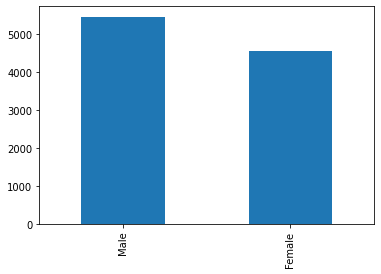

In [14]:
gender = df['gender'].value_counts()
gender.plot(kind = 'bar')

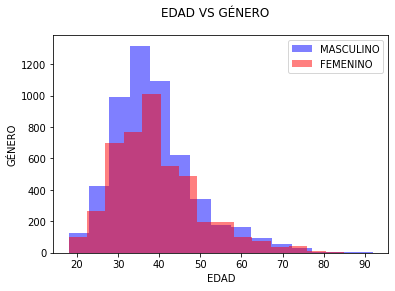

In [15]:
fig, ax = plt.subplots()

ax.hist(df[df['gender'] == 'Male']['age'], bins = 15, alpha = 0.5, color = 'blue', label = 'MASCULINO')
ax.hist(df[df['gender'] == 'Female']['age'], bins = 15, alpha = 0.5, color = 'red', label = 'FEMENINO')

ax.set_xlabel('EDAD')
ax.set_ylabel('GÉNERO')

fig.suptitle('EDAD VS GÉNERO')

ax.legend();

#### Análisis Geográfico

<AxesSubplot:>

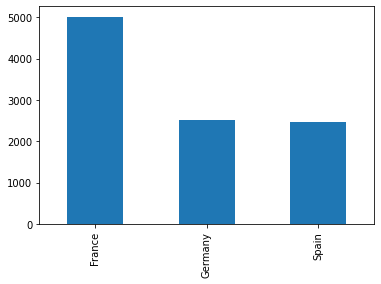

In [16]:
gender = df['geography'].value_counts()
gender.plot(kind = 'bar')

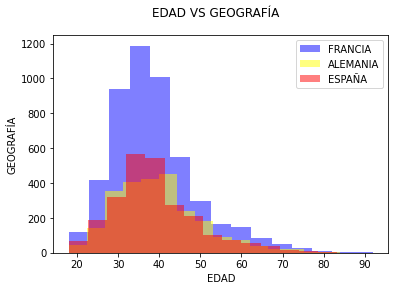

In [17]:
fig, ax = plt.subplots()

ax.hist(df[df['geography'] == 'France']['age'], bins = 15, alpha = 0.5, color = 'blue', label = 'FRANCIA')
ax.hist(df[df['geography'] == 'Germany']['age'], bins = 15, alpha = 0.5, color = 'yellow', label = 'ALEMANIA')
ax.hist(df[df['geography'] == 'Spain']['age'], bins = 15, alpha = 0.5, color = 'red', label = 'ESPAÑA')

ax.set_xlabel('EDAD')
ax.set_ylabel('GEOGRAFÍA')

fig.suptitle('EDAD VS GEOGRAFÍA')

ax.legend();

### Estudio de Valores Atípicos

In [18]:
# determinamos las funciones para calcular los valores atípicos

def lower_limit(Q1, Q3):
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    return lower

def upper_limit(Q1, Q3):
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    return upper

In [19]:
# determinamos la función para calcular los cuantiles

def quantiles(vector):
    Q1 = vector.quantile(0.25)
    Q3 = vector.quantile(0.75)
    return Q1, Q3

In [20]:
age = df['age']
quantiles(age)

(32.0, 44.0)

In [21]:
lower_limit(32.0, 44.0)

14.0

In [22]:
upper_limit(32.0, 44.0)

62.0

In [23]:
credit_score = df['credit_score']
quantiles(credit_score)

(584.0, 718.0)

In [24]:
lower_limit(584.0, 718.0)

383.0

In [25]:
upper_limit(584.0, 718.0)

919.0

In [26]:
# Funciones para el cálculo de porcentajes de valores atípicos que serán eliminados

def atypical_percentages_lower(vector, lower_threshold, dataframe):
    sum_vector = (vector < lower_threshold).sum()
    total_df = dataframe.shape[0]
    percentage = (sum_vector / total_df) * 100
    return percentage

def atypical_percentages_upper(vector, upper_threshold, dataframe):
    sum_vector = (vector > upper_threshold).sum()
    total_df = dataframe.shape[0]
    percentage = (sum_vector / total_df) * 100
    return percentage

In [27]:
# porcentaje de valores atípicos que serán eliminados (de la columna "credit_score")

atypical_percentages_lower(credit_score, 383.0, df)

0.15

In [28]:
# porcentaje de valores atípicos que serán eliminados (de la columna "age")

atypical_percentages_upper(age, 62.0, df)

3.5900000000000003

In [29]:
# almacenamos los datos sin valores atípicos en un nuevo dataframe

df_clean = df[(df['age'] < 62.0) & (df['credit_score'] > 383.0)]

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9573 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9573 non-null   int64  
 1   geography         9573 non-null   object 
 2   gender            9573 non-null   object 
 3   age               9573 non-null   int64  
 4   tenure            9573 non-null   float64
 5   balance           9573 non-null   float64
 6   num_products      9573 non-null   int64  
 7   credit_card       9573 non-null   int64  
 8   active_member     9573 non-null   int64  
 9   estimated_salary  9573 non-null   float64
 10  exited            9573 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 897.5+ KB


### Exploración de Datos Sin Valores Atípicos

#### Histogramas

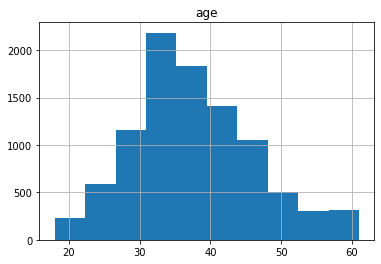

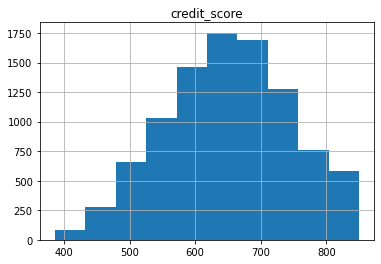

In [30]:
variables = ['age', 'credit_score']

for i in range(len(variables)):
    df_clean.hist(variables[i])

#### Diagramas de Caja

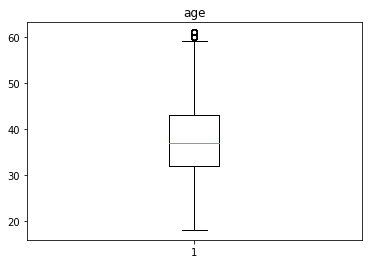

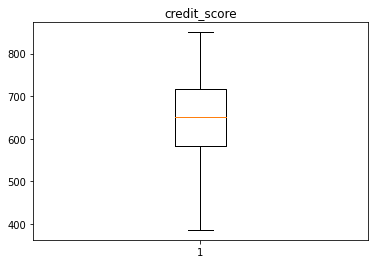

In [31]:
for variable in variables:
    plt.figure()
    plt.boxplot(df_clean[variable])
    plt.title(variable)

#### Estadística Descriptiva

In [32]:
for variable in variables:
    print(df_clean[variable].describe())

count    9573.000000
mean       37.650475
std         8.639096
min        18.000000
25%        32.000000
50%        37.000000
75%        43.000000
max        61.000000
Name: age, dtype: float64
count    9573.000000
mean      650.768516
std        96.021657
min       386.000000
25%       584.000000
50%       652.000000
75%       717.000000
max       850.000000
Name: credit_score, dtype: float64


## Estandarización de los Datos

In [33]:
# Codificación one-hot:

df_ohe = pd.get_dummies(df_clean, drop_first = True)

# aplicamos el requerimiento scaling/standarization a las variables numericas

var_num = ['credit_score', 'age', 'tenure', 'balance', 'num_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(df_ohe[var_num])

df_ohe[var_num] = scaler.transform(df_ohe[var_num])

# Estandarización

target = df_clean['exited']
features = df_ohe.drop('exited', axis=1)

# Separamos el conjunto de datos de prueba

features_train, features_vt, target_train, target_vt = train_test_split(features, target, test_size = 0.3, random_state = 12345)

features_test, features_valid, target_test, target_valid = train_test_split(features_vt, target_vt, test_size = 0.5, random_state = 12345 ) 


features_train.head()



,credit_score,age,tenure,balance,num_products,credit_card,active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
9196,1.491736,-0.075298,1.453113,-1.226145,0.807702,1,0,-0.558663,0,1,0
5295,0.575228,-1.001369,0.363108,1.746397,-0.914376,1,0,1.232860,1,0,0
3730,0.335686,0.040461,-0.726896,0.794906,-0.914376,0,0,-1.473825,0,1,1
2047,-1.059905,-0.075298,-1.090231,0.576844,0.807702,0,0,-0.916458,0,0,1
8285,-0.435013,-1.464405,1.816448,-1.226145,-0.914376,0,1,0.169680,0,0,1


## Evaluación de Modelos

### Frecuencia de Clases

0    0.798705
1    0.201295
Name: exited, dtype: float64


<AxesSubplot:>

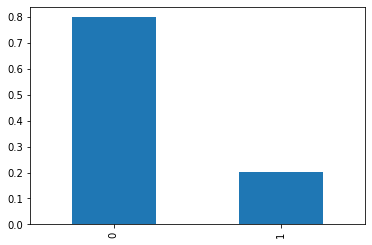

In [34]:
class_frecuency = df_clean['exited'].value_counts(normalize = True)
print(class_frecuency)
class_frecuency.plot(kind = 'bar')

**Conclusiones Intermedias:**

Se puede ver que existe un desbalance notorio en el estudio de la gráfica, donde las personas que se van del banco son un 20% mientras las que se quedan son un 80%. Un 20% lo consideramos determinante y es lo que se esperaba desde un principio.

### Construcción de Modelos Sin Ajuste de Clases

#### Regresión Logística

In [35]:
# evaluación del modelo sin ajuste de clases con conjunto de prueba

model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)

print('EXACTITUD CON DATOS DE PRUEBA:', accuracy_test)

EXACTITUD CON DATOS DE PRUEBA: 0.8238161559888579


In [36]:
# evaluación del modelo sin ajuste de clases con conjunto de entrebnamiento

model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_train, target_train)
predictions_train = model.predict(features_train)
accuracy_train = accuracy_score(target_train, predictions_train)

print('EXACTITUD CON DATOS DE ENTRENAMIENTO:', accuracy_train)

EXACTITUD CON DATOS DE ENTRENAMIENTO: 0.8270407401880316


In [37]:
# evaluación del model sin ajuste de clases con conjunto de validación

model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predictions_valid)

print('EXACTITUD CON DATOS DE VALIDACIÓN:', accuracy_valid)

EXACTITUD CON DATOS DE VALIDACIÓN: 0.8217270194986073


In [38]:
# calculamos F1 sin ajuste de clases con conjunto de prueba

print('F1:', f1_score(target_test, predictions_test))

F1: 0.3496143958868895


In [39]:
# calculamos F1 sin ajuste de clases con conjunto de entrenamiento

print('F1:', f1_score(target_train, predictions_train))

F1: 0.40165203923593185


In [40]:
# calculamos F1 sin ajuste de clases con conjunto de validacion

print('F1:', f1_score(target_valid, predictions_valid))

F1: 0.4046511627906976


In [41]:
# calculamos AUC-ROC sin ajuste de clases

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC:', auc_roc)

AUC-ROC: 0.7816239120825521


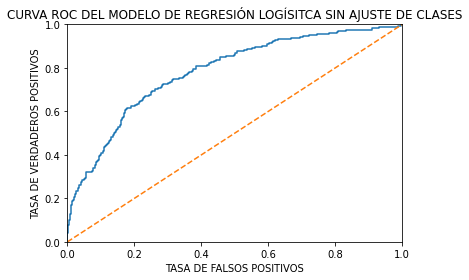

In [42]:
# mostramos la curva ROC sin ajuste de clases

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('TASA DE FALSOS POSITIVOS')
plt.ylabel('TASA DE VERDADEROS POSITIVOS')
plt.title('CURVA ROC DEL MODELO DE REGRESIÓN LOGÍSITCA SIN AJUSTE DE CLASES')
plt.show()

#### Árbol de Decisión

In [43]:
# evaluación del modelo sin ajuste de clases con conjunti de prueba

best_model = None
best_result = 0

for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    result = accuracy_score(target_test, predictions)
    
    if result > best_result:
        best_model = model
        best_result = result
        
print('EXACTITUD EN EL CONJUNTO DE PRUEBA:', best_result)

EXACTITUD EN EL CONJUNTO DE PRUEBA: 0.8593314763231198


In [44]:
# evaluación del modelo sin ajuste de clases con conjunto de entrenamiento

best_model = None
best_result = 0

for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_train)
    result = accuracy_score(target_train, predictions)
    
    if result > best_result:
        best_model = model
        best_result = result
        
print('EXACTITUD EN EL CONJUNTO DE ENTRENAMIENTO:', best_result)

EXACTITUD EN EL CONJUNTO DE ENTRENAMIENTO: 0.8630055215639457


In [45]:
# evaluación del modelo sin ajuste de clases con conjunto de validación

best_model = None
best_result = 0

for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions)
    
    if result > best_result:
        best_model = model
        best_result = result
        
print('EXACTITUD EN EL CONJUNTO DE VALIDACIÓN:', best_result)

EXACTITUD EN EL CONJUNTO DE VALIDACIÓN: 0.8481894150417827


In [46]:
# calculamos F1 sin ajuste de clases con conjunto de prueba

best_model = None
best_result = 0

for depth in range(1 , 6):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    result = f1_score(target_test, predictions)
    
    if result > best_result:
        best_model = model
        best_result = result
        
print('F1:', best_result)   

F1: 0.5530973451327433


In [47]:
# calculamos F1 sin ajuste de clases con conjunto de prueba

best_model = None
best_result = 0

for depth in range(1 , 6):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_train)
    result = f1_score(target_train, predictions)
    
    if result > best_result:
        best_model = model
        best_result = result
        
print('F1 CON CONJUNTO DE ENTRENAMIENTO:', best_result)   

F1 CON CONJUNTO DE ENTRENAMIENTO: 0.5628571428571428


In [48]:
# calculamos F1 sin ajuste de clases con conjunto de prueba

best_model = None
best_result = 0

for depth in range(1 , 6):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions)
    
    if result > best_result:
        best_model = model
        best_result = result
        
print('F1 CON CONJUNTO DE VALIDACION:', best_result)   

F1 CON CONJUNTO DE VALIDACION: 0.5341880341880342


In [49]:
# calculamos AUC-ROC sin ajuste de clases

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC:', auc_roc)

AUC-ROC: 0.8327876598533693


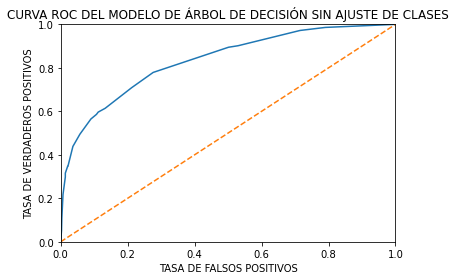

In [50]:
# mostramos la curva ROC sin ajuste de clases

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('TASA DE FALSOS POSITIVOS')
plt.ylabel('TASA DE VERDADEROS POSITIVOS')
plt.title('CURVA ROC DEL MODELO DE ÁRBOL DE DECISIÓN SIN AJUSTE DE CLASES')
plt.show()

#### Bosque Aleatorio

In [51]:
# evaluación del modelo sin ajuste de clases con conjunto de prueba

best_score = 0
best_est = 0

for est in range(1, 11):
    model = RandomForestClassifier(random_state = 12345, n_estimators = est)
    model.fit(features_train, target_train)
    score = model.score(features_test, target_test)
    
    if score > best_score:
        best_score = score
        best_est = est
        
print('EXACTITUD EN EL CONJUNTO DE PRUEBA (n_estimators = {}): {}'.format(best_est, best_score))

EXACTITUD EN EL CONJUNTO DE PRUEBA (n_estimators = 10): 0.8516713091922006


In [52]:
# evaluación del modelo sin ajuste de clases con conjunto de entrenamiento

best_score = 0
best_est = 0

for est in range(1, 11):
    model = RandomForestClassifier(random_state = 12345, n_estimators = est)
    model.fit(features_train, target_train)
    score = model.score(features_train, target_train)
    
    if score > best_score:
        best_score = score
        best_est = est
        
print('EXACTITUD EN EL CONJUNTO DE ENTRENAMIENTO (n_estimators = {}): {}'.format(best_est, best_score))

EXACTITUD EN EL CONJUNTO DE ENTRENAMIENTO (n_estimators = 9): 0.9883599462766751


In [53]:
# evaluación del modelo sin ajuste de clases con conjunto de validación

best_score = 0
best_est = 0

for est in range(1, 11):
    model = RandomForestClassifier(random_state = 12345, n_estimators = est)
    model.fit(features_train, target_train)
    score = model.score(features_valid, target_valid)
    
    if score > best_score:
        best_score = score
        best_est = est
        
print('EXACTITUD EN EL CONJUNTO DE VALIDACION (n_estimators = {}): {}'.format(best_est, best_score))

EXACTITUD EN EL CONJUNTO DE VALIDACION (n_estimators = 9): 0.850974930362117


In [54]:
# calculamos F1 sin ajuste de clases con conjunto de prueba

best_score = 0
best_est = 0

for est in range(1, 11):
    model = RandomForestClassifier(random_state = 12345, n_estimators = est)
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    score = f1_score(target_test, predictions)
    
    if score > best_score:
        best_score = score
        best_est = est
        
print('F1 (n_estimators = {}): {}'.format(best_est, best_score))        

F1 (n_estimators = 9): 0.5305263157894736


In [55]:
# calculamos F1 sin ajuste de clases con conjunto de entrenamiento

best_score = 0
best_est = 0

for est in range(1, 11):
    model = RandomForestClassifier(random_state = 12345, n_estimators = est)
    model.fit(features_train, target_train)
    predictions = model.predict(features_train)
    score = f1_score(target_train, predictions)
    
    if score > best_score:
        best_score = score
        best_est = est
        
print('F1 (n_estimators = {}): {}'.format(best_est, best_score)) 

F1 (n_estimators = 9): 0.9703196347031964


In [56]:
# calculamos F1 sin ajuste de clases con conjunto de validacion

best_score = 0
best_est = 0

for est in range(1, 11):
    model = RandomForestClassifier(random_state = 12345, n_estimators = est)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    score = f1_score(target_valid, predictions)
    
    if score > best_score:
        best_score = score
        best_est = est
        
print('F1 (n_estimators = {}): {}'.format(best_est, best_score)) 

F1 (n_estimators = 9): 0.5770750988142291


In [57]:
# calculamos AUC-ROC sin ajuste de clases

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print('AUC-ROC:', auc_roc)

AUC-ROC: 0.7973661347112351


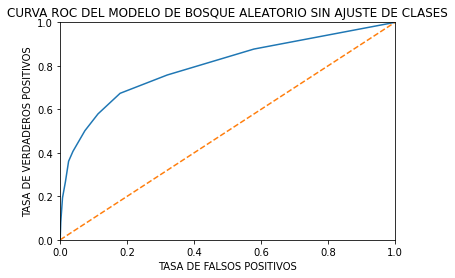

In [58]:
# mostramos la curva ROC sin ajuste de clases

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('TASA DE FALSOS POSITIVOS')
plt.ylabel('TASA DE VERDADEROS POSITIVOS')
plt.title('CURVA ROC DEL MODELO DE BOSQUE ALEATORIO SIN AJUSTE DE CLASES')
plt.show()

### Construcción de Modelos Con Ajuste de Clases

#### Regresión Logística

In [59]:
# evaluación del modelo con ajuste de clases con conjunto de prueba

model = LogisticRegression(random_state = 12345, solver = 'liblinear', class_weight = 'balanced')
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)

print('EXACTITUD EN EL CONJUNTO DE PRUEBA:', accuracy_test)

EXACTITUD EN EL CONJUNTO DE PRUEBA: 0.7214484679665738


In [60]:
# evaluación del modelo con ajuste de clases con conjunto de entrenamiento

model = LogisticRegression(random_state = 12345, solver = 'liblinear', class_weight = 'balanced')
model.fit(features_train, target_train)
predictions_train = model.predict(features_train)
accuracy_train = accuracy_score(target_train, predictions_train)

print('EXACTITUD EN EL CONJUNTO DE ENTRENAMIENTO:', accuracy_train)

EXACTITUD EN EL CONJUNTO DE ENTRENAMIENTO: 0.7260110431278913


In [61]:
# evaluación del modelo con ajuste de clases con conjunto de validación

model = LogisticRegression(random_state = 12345, solver = 'liblinear', class_weight = 'balanced')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
accuracy_valid  = accuracy_score(target_valid, predictions_valid)

print('EXACTITUD EN EL CONJUNTO DE PRUEBA:', accuracy_valid)

EXACTITUD EN EL CONJUNTO DE PRUEBA: 0.7402506963788301


In [62]:
# calculamos F1 con ajuste de clases con el conjunto de prueba

predicted_test = model.predict(features_test)
print('F1:', f1_score(target_test, predicted_test))

F1: 0.5049504950495048


In [63]:
# calculamos F1 con ajuste de clases con el conjunto de entrenamiento

predicted_train = model.predict(features_train)
print('F1:', f1_score(target_train, predicted_train))

F1: 0.51092168353756


In [64]:
# calculamos F1 con ajuste de clases con el conjunto de validacion

predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.5412054120541206


In [65]:
# calculamos AUC-ROC con ajuste de clases

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC:', auc_roc)

AUC-ROC: 0.7822915237703294


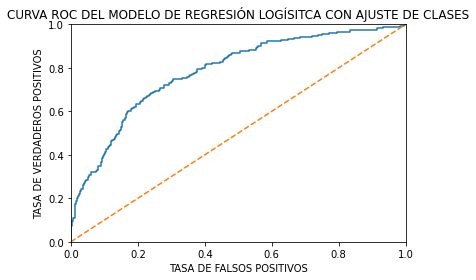

In [66]:
# mostramos la curva ROC con ajuste de clases

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('TASA DE FALSOS POSITIVOS')
plt.ylabel('TASA DE VERDADEROS POSITIVOS')
plt.title('CURVA ROC DEL MODELO DE REGRESIÓN LOGÍSITCA CON AJUSTE DE CLASES')
plt.show()

##### Sobremuestreo

In [67]:
# definimos las funciones para ajustar las clases 

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state = 12345
    )
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(
    features_train, target_train, 20
)

In [68]:
# evaluación del modelo con ajuste de clases con sobremuestreo con conjunto de prueba

model.fit(features_upsampled, target_upsampled)
predictions_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)

print('EXACTITUD EN EL CONJUNTO DE PRUEBA:', accuracy_test)

EXACTITUD EN EL CONJUNTO DE PRUEBA: 0.7214484679665738


In [69]:
# evaluación del modelo con ajuste de clases con sobremuestreo con conjunto de entrenamiento

model.fit(features_upsampled, target_upsampled)
predictions_train = model.predict(features_train)
accuracy_train = accuracy_score(target_train, predictions_train)

print('EXACTITUD EN EL CONJUNTO DE ENTRENAMIENTO:', accuracy_train)

EXACTITUD EN EL CONJUNTO DE ENTRENAMIENTO: 0.726309506043874


In [70]:
# evaluación del modelo con ajuste de clases con sobremuestreo con conjunto de validación

model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predictions_valid)

print('EXACTITUD EN EL CONJUNTO DE VALIDACION:', accuracy_valid)

EXACTITUD EN EL CONJUNTO DE VALIDACION: 0.7402506963788301


In [71]:
# calculamos F1 con ajuste de clases con sobremuestreo con conjunto de prueba

print('F1:', f1_score(target_test, predicted_test))

F1: 0.5049504950495048


In [72]:
# calculamos AUC-ROC con ajuste de clases con sobremuestreo

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print('AUC-ROC:', auc_roc)

AUC-ROC: 0.7822884753151341


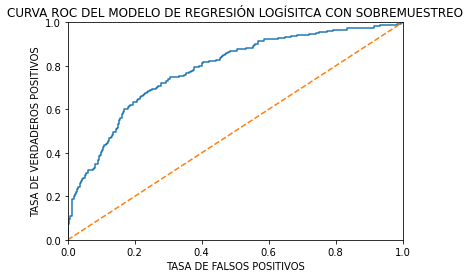

In [73]:
# mostramos la curva ROC con ajuste de clases con sobremuestreo

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('TASA DE FALSOS POSITIVOS')
plt.ylabel('TASA DE VERDADEROS POSITIVOS')
plt.title('CURVA ROC DEL MODELO DE REGRESIÓN LOGÍSITCA CON SOBREMUESTREO')
plt.show()

##### Submuestreo

In [74]:
# definimos las funciones para ajustar las clases 

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac = fraction, random_state = 12345)] + [features_ones]
    )
    
    target_downsampled = pd.concat(
        [target_zeros.sample(frac = fraction, random_state = 12345)] + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state = 12345
    )
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

In [75]:
# evaluación del modelo con ajuste de clases con submuestreo

model.fit(features_downsampled, target_downsampled)
predictions_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)

print('EXACTITUD EN EL CONJUNTO DE PRUEBA:', accuracy_test)

EXACTITUD EN EL CONJUNTO DE PRUEBA: 0.7193593314763231


In [76]:
# evaluación del modelo con ajuste de clases con submuestreo

model.fit(features_downsampled, target_downsampled)
predictions_train = model.predict(features_train)
accuracy_train = accuracy_score(target_train, predictions_train)

print('EXACTITUD EN EL CONJUNTO DE ENTRENAMIENTO:', accuracy_train)

EXACTITUD EN EL CONJUNTO DE ENTRENAMIENTO: 0.7281002835397702


In [77]:
# evaluación del modelo con ajuste de clases con submuestreo

model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predictions_valid)

print('EXACTITUD EN EL CONJUNTO DE VALIDACION:', accuracy_valid)

EXACTITUD EN EL CONJUNTO DE VALIDACION: 0.7325905292479109


In [78]:
# calculamos F1 con ajuste de clases con submuestreo con conjunto de prueba

print('F1:', f1_score(target_test, predicted_test))

F1: 0.5049504950495048


In [79]:
# calculamos AUC-ROC con ajuste de clases con submuestreo

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print('AUC-ROC:', auc_roc)

AUC-ROC: 0.7809258158428217


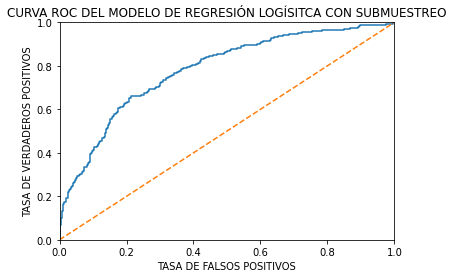

In [80]:
# mostramos la curva ROC con ajuste de clases con submuestreo


fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('TASA DE FALSOS POSITIVOS')
plt.ylabel('TASA DE VERDADEROS POSITIVOS')
plt.title('CURVA ROC DEL MODELO DE REGRESIÓN LOGÍSITCA CON SUBMUESTREO')
plt.show()

#### Árbol de Decisión

In [81]:
best_model = None
best_result = 0

for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth, class_weight = 'balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    result = accuracy_score(target_test, predictions)
    
    if result > best_result:
        best_model = model
        best_result = result
        
print('EXACTITUD EN EL CONJUNTO DE PRUEBA:', best_result)

EXACTITUD EN EL CONJUNTO DE PRUEBA: 0.7771587743732591


In [82]:
best_model = None
best_result = 0

for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth, class_weight = 'balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_train)
    result = accuracy_score(target_train, predictions)
    
    if result > best_result:
        best_model = model
        best_result = result
        
print('EXACTITUD EN EL CONJUNTO DE ENTRENAMIENTO:', best_result)

EXACTITUD EN EL CONJUNTO DE ENTRENAMIENTO: 0.7803312938367408


In [83]:
best_model = None
best_result = 0

for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth, class_weight = 'balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions)
    
    if result > best_result:
        best_model = model
        best_result = result
        
print('EXACTITUD EN EL CONJUNTO DE VALIDACION:', best_result)

EXACTITUD EN EL CONJUNTO DE VALIDACION: 0.7778551532033426


In [84]:
best_model = None
best_result = 0

for depth in range(1 , 6):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth, class_weight = 'balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    result = f1_score(target_test, predictions)
    
    if result > best_result:
        best_model = model
        best_result = result
        
print('F1 con conjunto de prueba:', best_result)        

F1 con conjunto de prueba: 0.5541561712846347


In [85]:
best_model = None
best_result = 0

for depth in range(1 , 6):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth, class_weight = 'balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_train)
    result = f1_score(target_train, predictions)
    
    if result > best_result:
        best_model = model
        best_result = result
        
print('F1 con conjunto de entrenamiento:', best_result)   

F1 con conjunto de entrenamiento: 0.5712740059507709


In [86]:
best_model = None
best_result = 0

for depth in range(1 , 6):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth, class_weight = 'balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions)
    
    if result > best_result:
        best_model = model
        best_result = result
        
print('F1 con conjunto de validación:', best_result)   

F1 con conjunto de validación: 0.5804020100502512


In [87]:
# calculamos AUC-ROC

probabilities_train = model.predict_proba(features_train)
probabilities_one_train = probabilities_train[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print('AUC-ROC:', auc_roc)

AUC-ROC: 0.7809258158428217


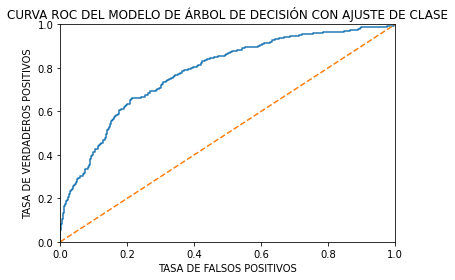

In [88]:
# mostramos la curva ROC

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('TASA DE FALSOS POSITIVOS')
plt.ylabel('TASA DE VERDADEROS POSITIVOS')
plt.title('CURVA ROC DEL MODELO DE ÁRBOL DE DECISIÓN CON AJUSTE DE CLASE')
plt.show()

##### Sobremuestreo

In [89]:
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 20
)

In [90]:
model.fit(features_upsampled, target_upsampled)
predictions_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)

print('EXACTITUD CON DATOS DE PRUEBA:', accuracy_test)

EXACTITUD CON DATOS DE PRUEBA: 0.7534818941504178


In [91]:
model.fit(features_upsampled, target_upsampled)
predictions_train = model.predict(features_train)
accuracy_train = accuracy_score(target_train, predictions_train)

print('EXACTITUD CON DATOS DE ENTRENAMIENTO:', accuracy_train)

EXACTITUD CON DATOS DE ENTRENAMIENTO: 0.7634681390837188


In [92]:
model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predictions_valid)

print('EXACTITUD CON DATOS DE PRUEBA:', accuracy_valid)

EXACTITUD CON DATOS DE PRUEBA: 0.7674094707520891


In [93]:
# calculamos F1

print('F1:', f1_score(target_test, predicted_test))

F1: 0.5049504950495048


In [94]:
# calculamos AUC-ROC

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8353712256314112


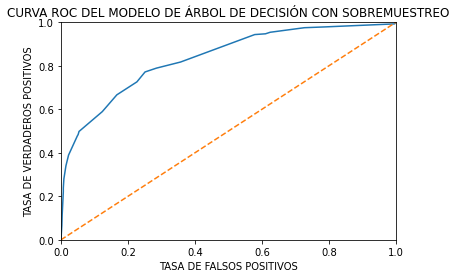

In [95]:
# mostramos la curva ROC

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('TASA DE FALSOS POSITIVOS')
plt.ylabel('TASA DE VERDADEROS POSITIVOS')
plt.title('CURVA ROC DEL MODELO DE ÁRBOL DE DECISIÓN CON SOBREMUESTREO')
plt.show()

##### SUBMUESTREO

In [96]:
features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

In [97]:
model.fit(features_downsampled, target_downsampled)
predictions_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)

print('EXACTITUD CON DATOS DE PRUEBA:', accuracy_test)

EXACTITUD CON DATOS DE PRUEBA: 0.7263231197771588


In [98]:
model.fit(features_downsampled, target_downsampled)
predictions_train = model.predict(features_train)
accuracy_train = accuracy_score(target_train, predictions_train)

print('EXACTITUD CON DATOS DE ENTRENAMIENTO:', accuracy_train)

EXACTITUD CON DATOS DE ENTRENAMIENTO: 0.7373526339352335


In [99]:
model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predictions_valid)

print('EXACTITUD CON DATOS DE VALIDACION:', accuracy_valid)

EXACTITUD CON DATOS DE VALIDACION: 0.7360724233983287


In [100]:
print('F1:', f1_score(target_test, predicted_test))

F1: 0.5049504950495048


In [101]:
# calculamos AUC-ROC

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print('AUC-ROC:', auc_roc)

AUC-ROC: 0.8115947993354368


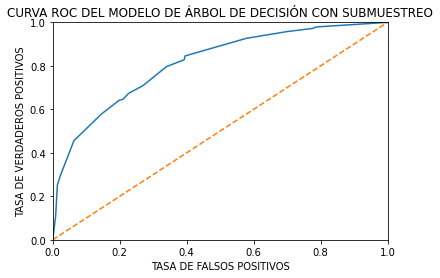

In [102]:
# mostramos la curva ROC

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('TASA DE FALSOS POSITIVOS')
plt.ylabel('TASA DE VERDADEROS POSITIVOS')
plt.title('CURVA ROC DEL MODELO DE ÁRBOL DE DECISIÓN CON SUBMUESTREO')
plt.show()

#### Bosque Aleatorio

In [103]:
best_score = 0
best_est = 0

for est in range(1, 11):
    model = RandomForestClassifier(random_state = 12345, n_estimators = est, class_weight = 'balanced')
    model.fit(features_train, target_train)
    score = model.score(features_test, target_test)
    
    if score > best_score:
        best_score = score
        best_est = est
        
print('EXACTITUD DEL MEJOR MODELO EN EL CONJUNTO DE PRUEBA (n_estimators = {}): {}'.format(best_est, best_score))

EXACTITUD DEL MEJOR MODELO EN EL CONJUNTO DE PRUEBA (n_estimators = 10): 0.8551532033426184


In [104]:
best_score = 0
best_est = 0

for est in range(1, 11):
    model = RandomForestClassifier(random_state = 12345, n_estimators = est, class_weight = 'balanced')
    model.fit(features_train, target_train)
    score = model.score(features_train, target_train)
    
    if score > best_score:
        best_score = score
        best_est = est
        
print('EXACTITUD DEL MEJOR MODELO EN EL CONJUNTO DE ENTRENAMIENTO (n_estimators = {}): {}'.format(best_est, best_score))

EXACTITUD DEL MEJOR MODELO EN EL CONJUNTO DE ENTRENAMIENTO (n_estimators = 9): 0.9867184002387703


In [105]:
best_score = 0
best_est = 0

for est in range(1, 11):
    model = RandomForestClassifier(random_state = 12345, n_estimators = est, class_weight = 'balanced')
    model.fit(features_train, target_train)
    score = model.score(features_valid, target_valid)
    
    if score > best_score:
        best_score = score
        best_est = est
        
print('EXACTITUD DEL MEJOR MODELO EN EL CONJUNTO DE VALIDACION (n_estimators = {}): {}'.format(best_est, best_score))

EXACTITUD DEL MEJOR MODELO EN EL CONJUNTO DE VALIDACION (n_estimators = 8): 0.8426183844011143


In [106]:
best_score = 0
best_est = 0

for est in range(1, 11):
    model = RandomForestClassifier(random_state = 12345, n_estimators = est, class_weight = 'balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    score = f1_score(target_test, predictions)
    
    if score > best_score:
        best_score = score
        best_est = est
        
print('F1 DEL MODELO CON CONJUNTO DE PRUEBA(n_estimators = {}): {}'.format(best_est, best_score))     

F1 DEL MODELO CON CONJUNTO DE PRUEBA(n_estimators = 9): 0.5504201680672268


In [107]:
best_score = 0
best_est = 0

for est in range(1, 11):
    model = RandomForestClassifier(random_state = 12345, n_estimators = est, class_weight = 'balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_train)
    score = f1_score(target_train, predictions)
    
    if score > best_score:
        best_score = score
        best_est = est
        
print('F1 DEL MODELO CON CONJUNTO DE ENTRENAMIENTO (n_estimators = {}): {}'.format(best_est, best_score))     

F1 DEL MODELO CON CONJUNTO DE ENTRENAMIENTO (n_estimators = 9): 0.9659134431252394


In [108]:
best_score = 0
best_est = 0

for est in range(1, 11):
    model = RandomForestClassifier(random_state = 12345, n_estimators = est, class_weight = 'balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    score = f1_score(target_valid, predictions)
    
    if score > best_score:
        best_score = score
        best_est = est
        
print('F1 DEL MODELO CON CONJUNTO DE VALIDACION (n_estimators = {}): {}'.format(best_est, best_score))     

F1 DEL MODELO CON CONJUNTO DE VALIDACION (n_estimators = 9): 0.5365853658536586


In [109]:
# calculamos AUC-ROC

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print('AUC-ROC:', auc_roc)

AUC-ROC: 0.8111588702425045


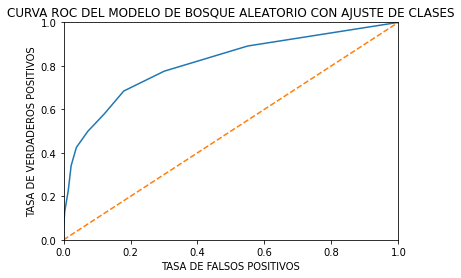

In [110]:
# mostramos la curva ROC

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('TASA DE FALSOS POSITIVOS')
plt.ylabel('TASA DE VERDADEROS POSITIVOS')
plt.title('CURVA ROC DEL MODELO DE BOSQUE ALEATORIO CON AJUSTE DE CLASES')
plt.show()

##### Sobremuestreo

In [111]:
# ajustamos de clase usando submuestreo

features_upsampled, target_upsampled = upsample(
    features_train, target_train, 20
)

In [112]:
# calculamos la exactitud del modelo de bosque aleatorio con submuestreo

model.fit(features_upsampled, target_upsampled)
predictions_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)

print('EXACTITUD CON DATOS DE PRUEBA:', accuracy_test)

EXACTITUD CON DATOS DE PRUEBA: 0.8516713091922006


In [113]:
# calculamos la exactitud del modelo de bosque aleatorio con submuestreo

model.fit(features_upsampled, target_upsampled)
predictions_train = model.predict(features_train)
accuracy_train = accuracy_score(target_train, predictions_train)

print('EXACTITUD CON DATOS DE ENTRENAMIENTO:', accuracy_train)

EXACTITUD CON DATOS DE ENTRENAMIENTO: 0.9983584539620952


In [114]:
# calculamos la exactitud del modelo de bosque aleatorio con submuestreo

model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predictions_valid)

print('EXACTITUD CON DATOS DE VALIDACION:', accuracy_valid)

EXACTITUD CON DATOS DE VALIDACION: 0.8384401114206128


In [115]:
# calculamos F1 del modelo de bosque aleatorio con sobremuestreo

print('F1:', f1_score(target_test, predicted_test))

F1: 0.5049504950495048


In [116]:
# calculamos AUC-ROC

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print('AUC-ROC:', auc_roc)

AUC-ROC: 0.8193333028487814


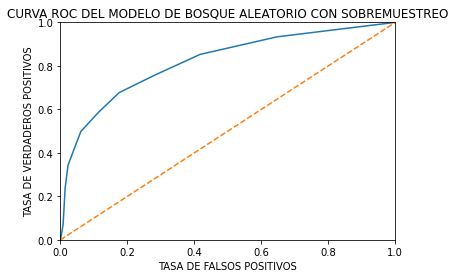

In [117]:
# mostramos la curva ROC

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('TASA DE FALSOS POSITIVOS')
plt.ylabel('TASA DE VERDADEROS POSITIVOS')
plt.title('CURVA ROC DEL MODELO DE BOSQUE ALEATORIO CON SOBREMUESTREO')
plt.show()

##### Submuestreo



In [118]:
# ajustamos de clase usando submuestreo

features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

In [119]:
# calculamos la exactitud del modelo de bosque aleatorio con submuestreo

model.fit(features_downsampled, target_downsampled)
predictions_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)

print('EXACTITUD CON DATOS DE PRUEBA:', accuracy_test)

EXACTITUD CON DATOS DE PRUEBA: 0.6086350974930362


In [120]:
# calculamos la exactitud del modelo de bosque aleatorio con submuestreo

model.fit(features_downsampled, target_downsampled)
predictions_train = model.predict(features_train)
accuracy_train = accuracy_score(target_train, predictions_train)

print('EXACTITUD CON DATOS DE ENTRENAMIENTO:', accuracy_train)

EXACTITUD CON DATOS DE ENTRENAMIENTO: 0.677361587822713


In [121]:
# calculamos la exactitud del modelo de bosque aleatorio con submuestreo

model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predictions_valid)

print('EXACTITUD CON DATOS DE VALIDACION:', accuracy_valid)

EXACTITUD CON DATOS DE VALIDACION: 0.6051532033426184


In [122]:
# calculamos F1 del modelo de bosque aleatorio con submuestreo

print('F1:', f1_score(target_test, predicted_test))

F1: 0.5049504950495048


In [123]:
# calculamos AUC-ROC

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print('AUC-ROC:', auc_roc)

AUC-ROC: 0.8012513908576828


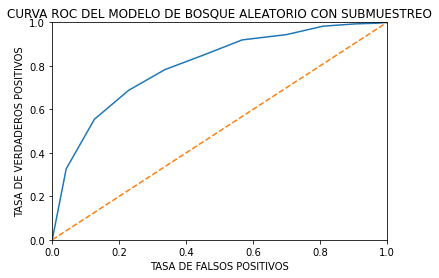

In [124]:
# mostramos la curva ROC

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('TASA DE FALSOS POSITIVOS')
plt.ylabel('TASA DE VERDADEROS POSITIVOS')
plt.title('CURVA ROC DEL MODELO DE BOSQUE ALEATORIO CON SUBMUESTREO')
plt.show()

## Validación del Modelo Seleccionado

In [125]:
# Evaluamos la exactitud del modelo del árbol de decisión con los datos de prueba, usando el ajuste de clases

best_model = None
best_result = 0

for depth in range(1, 7):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth, class_weight = 'balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions)
    
    if result > best_result:
        best_model = model
        best_result = result
        
print('EXACTITUD DEL MEJOR MODELO EN EL CONJUNTO DE PRUEBA:', best_result)  

EXACTITUD DEL MEJOR MODELO EN EL CONJUNTO DE PRUEBA: 0.7778551532033426


In [126]:
# calculamos F1 del árbol de decisión con los datos de validación

best_model = None
best_result = 0

for depth in range(1, 7):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth, class_weight = 'balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions)
    
    if result > best_result:
        best_model = model
        best_result = result
        
print('F1:', best_result)  

F1: 0.5804020100502512


In [127]:
# calculamos AUC-ROC

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8275670680676959


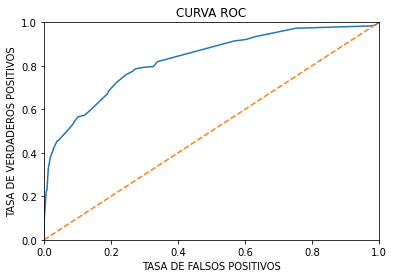

In [128]:
# mostramos la curva ROC

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('TASA DE FALSOS POSITIVOS')
plt.ylabel('TASA DE VERDADEROS POSITIVOS')
plt.title('CURVA ROC')
plt.show()

## Conclusiones

**Las variables de "age" y "credit_score" mostraron valores atípicos. Para "age", un 3.6% de los valores estaban por encima del valor límite superior mientras que para "credit_score", un 0.15% de los valores estaban por debajo del límite inferior. Se procedió a eliminar estos valores.**

**Sin el ajuste de clases, hay dos modelos que cumplen con el objetivo de F1 de 0.54, los cuales son: árbol de decisión y bosque aleatorio. Cabe destacar que estos dos modelos nos brindan buenos resultados, incluso sin balancear las clases.**

**En la etapa de prueba, el mejor modelo de predicción de la retención de clientes fue el del árbol de decisión, con un F1 igual a 0.57. Acá, se utilizaron datos de prueba balanceados por el método "class_weight = 'balanced'". Asimismo, se obtuvo un sobreajuste mínimo (+1%), los resultados de exactitud y el coeficiente AUC-ROC fueron aceptables (0.77 y 0.84, respectivamente). No obstante, el modelo no cumplió con el objetivo requerido (F1 = 0.59).**

**Al momento de predecir la retención de los clientes, el modelo del árbol de decisión fue balanceado con el parámetro "class_weight = 'balanced'", siendo validado con un resultado de F1 igual a 0.59, lo cual cumple con el objetivo requerido.**